# Lecture 11

### Testing Hypotheses

## Announcements
* Project due tonight 11:59pm
* You can turn it in one day late for ten percent deduction
* Lab 5 due Friday

In [79]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
plt.style.use('fivethirtyeight')

## Choosing One of Two Viewpoints 
* Based on data, one can try to determine:

    - “Chocolate has no effect on cardiac disease.”
    - “Yes, chocolate does have an effect on cardiac disease.”

* Based on data, one can try to determine:

    - “This jury panel was selected at random from eligible jurors.”
    - “No, it has too many people with college degrees.”



# Example: Jury Selection

### Swain vs. Alabama, 1965
* Talladega County, Alabama
* Robert Swain, black man convicted of crime
* Appeal: one factor was all-white jury
* Only men 21 years or older were allowed to serve
* 26% of this population were black
* Swain’s jury panel consisted of 100 men
* 8 men on the panel were black


### Supreme Court Ruling

* About disparities between the percentages in the eligible population and the jury panel, the Supreme Court wrote:

> "... the overall percentage disparity has been small and reflects no studied attempt to include or exclude a specified number of Negroes”

* The Supreme Court denied Robert Swain’s appeal
* Is this conclusion reasonable? Let's check.


### The model
* Jury panel is 100 *randomly chosen* eligible prospective jurors
* 26% of this population were black

### Question
* Is the model good, or not?

## Sampling from a Distribution

* Sample at random from a categorical distribution

`sample_proportions(sample_size, pop_distribution)`

* Samples at random from the population
    - Returns an array containing the distribution of the categories in the sample


In [80]:
population = np.array([0]*26 + [1]*74)
population

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [85]:
sample = np.random.choice(population, 100)
sample

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [86]:
np.count_nonzero(sample==0)/100

0.19

In [87]:
np.count_nonzero(sample==1)/100

0.81

In [88]:
make_array(np.count_nonzero(sample==0)/100, np.count_nonzero(sample==1)/100)

array([0.19, 0.81])

In [89]:
sample_proportions(100, make_array(0.26, 0.74))

array([0.23, 0.77])

### Calculate the statistic: 
* number of black men among random sample of 100 men from eligible population

In [90]:
eligible_population = make_array(0.26, 0.74)

In [91]:
# sample from `eligible_population` 100 times
sample_proportions(100, eligible_population)

array([0.18, 0.82])

In [92]:
100 * sample_proportions(100, eligible_population).item(0) #count of how many black men

26.0

### Simulate drawing the jury panel
* run 10,000 simulations
* keep number of black men in each panel in array `counts`

In [94]:
counts = make_array()

for i in np.arange(10000):
    new_count = 100 * sample_proportions(100, eligible_population).item(0)
    counts = np.append(counts, new_count)

counts

array([30., 21., 29., ..., 27., 30., 22.])

### Visualize the simulation
* Was a jury panel with 8 black men suspiciously unusual?

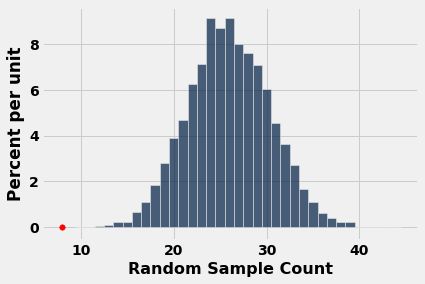

In [96]:
Table().with_column('Random Sample Count', counts).hist(bins = np.arange(9.5, 45, 1))

observed_count = 8
plt.scatter(observed_count, 0, color='red', s=30);

# Example: the Genetics of Peas

## Gregor Mendel, 1822-1884
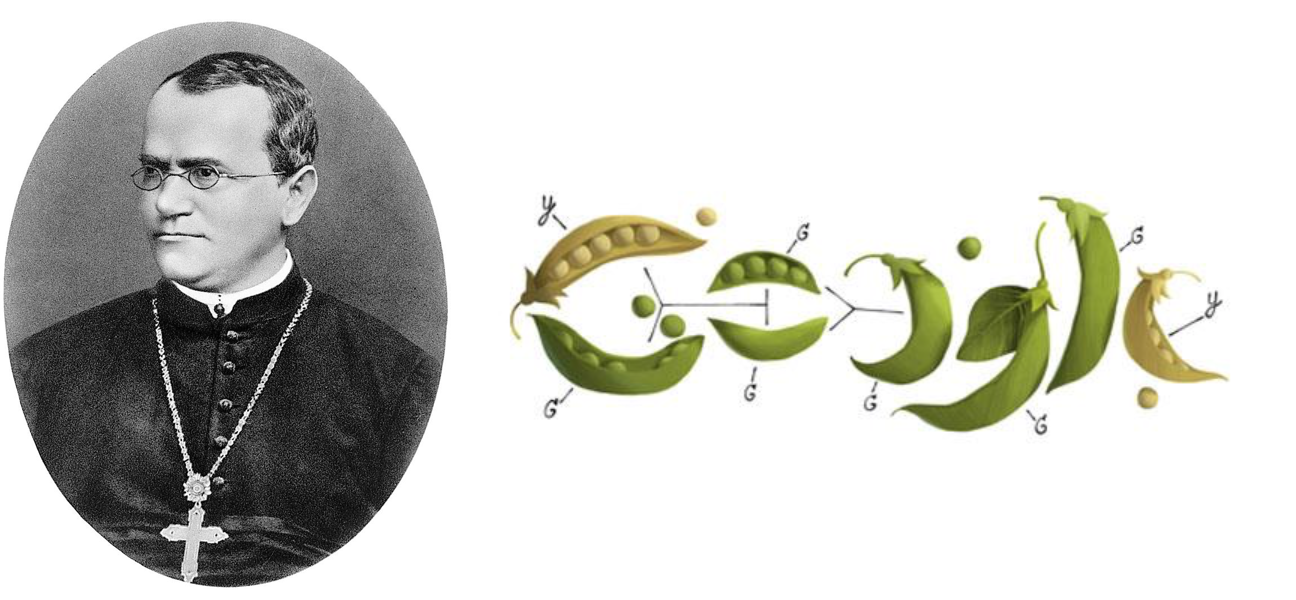

## Mendel's model

* Pea plants of a particular kind (929 plants)
* Each one has either purple flowers or white flowers

* Mendel’s model:
    - Each plant is purple-flowering with chance 75%,
    - regardless of the colors of the other plants.

### Question
* Is the model good, or not?

### Choosing a Statistic

Given a sample of pea plants with colored flowers. What statistic would you use to measure whether the sample seems to be generated according to the model?

### The statistic
* Distance between sample percent (of purple plants) and 75  
```| 'sample percent of purple-flowering plants' - 75 |```
* If the statistic is large, that is evidence against the model
* If the statistic is small, that is evidence in favor of the model

In [97]:
model = make_array(0.75, 0.25)

In [98]:
sample_proportions(929, model)

array([0.71905274, 0.28094726])

In [104]:
abs(100 * sample_proportions(929, model).item(0) - 75)

0.6727664155005328

### Simulate Mendel's experiment
* Mendel observed results of growing 929 pea plants

In [105]:
distances = make_array()

for i in np.arange(10000):
    new_distance = abs(100 * sample_proportions(929, model).item(0) - 75)
    distances = np.append(distances, new_distance)

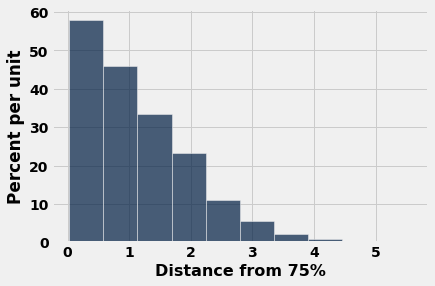

In [106]:
Table().with_column('Distance from 75%', distances).hist()

### Mendel's experiment
Of the 929 pea plants, Medel observed 705 of these had purple flowers.
 - A. This is evidence in favor of the model  
 - B. This is evidence against the model

In [107]:
observed_distance =  abs(100*(705/929) - 75)
observed_distance

0.8880516684607045

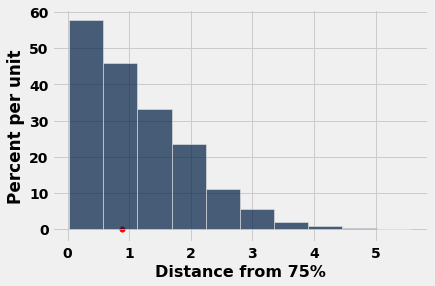

In [108]:
Table().with_column('Distance from 75%', distances).hist()
plt.scatter(observed_distance, 0, color='red', s=30);

## Summary

A model is an assumption about how data was generated. We want to figure out whether observed data was likely generated in the way suggested by the model. To do this:
 - Choose a statistic 
     - should measure how similar a data set is to what you would expect from the model
     - should help you decide between the model and alternative views of how data was generated
 - Predict the statistic under the model
     - simulate many data sets under the assumptions of the model, and calculate the statistic for each of them
 - Compare the data to the predictions
     - calculate the value of the statistic for the observed data set
     - determine whether the observed statistic is similar to the simulated statistics

### Discussion Question

In each scencario, choose a statistic that will help you decide between the two given viewpoints.

#### Scenario A:  “This coin is fair.” vs. “No, it’s not.”

#### Scenario B:  “This coin is biased towards heads.” vs. “This coin is NOT biased towards heads.”


* Starting point: number of heads in 400 tosses.
* Number near `0.5 * 400` suggests 'fair'.

### Answers 

#### Scenario A:  “This coin is fair.” vs. “No, it’s not.”

* Large *and* small values of the number of heads suggest "not fair"
* Use the **distance** beween the number of heads and 200.
* Now only large values of the statistic suggest "not fair"

Statistic: `| number of heads - 200 |`

#### Scenario B:  “This coin is biased towards heads.” vs. “This coin is NOT biased towards heads.”

* Large values of the number of heads suggest "biased toward heads".

Statistic: `number of heads`

## Let's simulate it

### Pick a (possibly) biased coin
* Don't look!
* Flip this coin 400 times

In [109]:
np.random.seed(42)

# pick a (possibly) biased coin
prob = np.random.choice([0.4, 0.5, 0.6])

# flip this coin 400 times; flips = [Num Heads, Num Tails]
flips = sample_proportions(400, make_array(prob, 1 - prob)) * 400

#will become the red dot on the histogram (observed value)

### Compute the statistics
* Is the coin biased?
* Is the coin biased toward heads?
* Try it on our observation `flips`.

In [110]:
def num_heads(arr):
    return arr.item(0)

def dist_from_200(arr):
    return abs(arr.item(0) - 200)

In [111]:
print(dist_from_200(flips))

36.0


### What do these statistics look like for a fair coin?
* Define the model for a fair coin
* Define our statistics (done)
* Run the simulation: flip coins, calculate statistic, add to results, repeat
* Write results of simulation into an array `results`

In [112]:
model = make_array(0.5,0.5)

repetitions = 10000
results = make_array()
for _ in np.arange(repetitions):
    coins = sample_proportions(400, model) * 400
    result = np.abs(coins.item(0) - 200)
    results = np.append(results, result)

results

array([12.,  8.,  8., ...,  4., 12.,  9.])

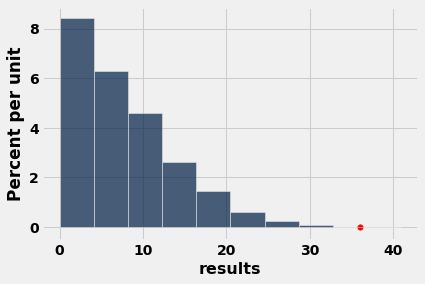

In [113]:
Table().with_column('results', results).hist()
plt.scatter(dist_from_200(flips), 0, color='red', s=30);

### Is the coin biased toward heads?

In [114]:
model = make_array(0.5, 0.5)

repetitions = 10000
results = make_array()
for _ in np.arange(repetitions):
    coins = sample_proportions(400, model) * 400
    result = num_heads(coins)
    results = np.append(results, result)

results

array([222., 223., 198., ..., 182., 212., 213.])

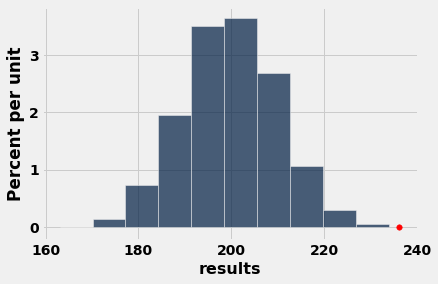

In [115]:
Table().with_column('results', results).hist()
plt.scatter(num_heads(flips), 0, color='red', s=30);

### Was the coin biased?

In [116]:
prob

0.6

### What if the coin were biased just a little?

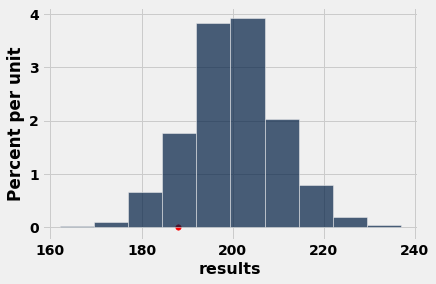

In [117]:
prob = 0.51
flips = sample_proportions(400, make_array(prob, 1 - prob)) * 400
#for the red dot, observed value

model = make_array(0.5,0.5)

repetitions = 10000
results = make_array()
for _ in np.arange(repetitions):
    coins = sample_proportions(400, model) * 400
    result = num_heads(coins)
    results = np.append(results, result)

Table().with_column('results', results).hist()
plt.scatter(num_heads(flips), 0, color='red', s=30);

### Discussion Question
* If the coin were biased toward heads with probability 0.51, how can we change the experiment to detect the bias?

|Option|Answer|
|---|---|
|A.|Increase the number of experiments|
|B.|Increase the number of coin flips per experiment|
|C.|Find a totally different statistic|
|D.|There's no way to detect a bias this small|


### Answer

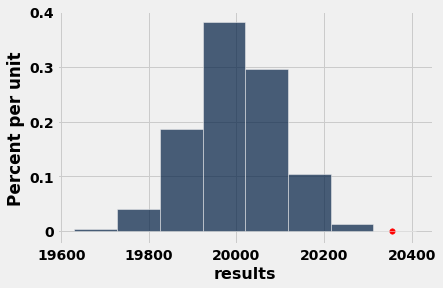

In [119]:
num_flips = 40000
repetitions = 10000

prob=0.51
flips = sample_proportions(num_flips, make_array(prob, 1 - prob)) * num_flips

model = make_array(0.5,0.5)
results = make_array()
for _ in np.arange(repetitions):
    coins = sample_proportions(num_flips, model) * num_flips
    result = num_heads(coins)
    results = np.append(results, result)

Table().with_column('results', results).hist(bins=8)
plt.scatter(num_heads(flips), 0, color='red', s=30);

# Comparing distributions

### Jury Selection in Alameda County

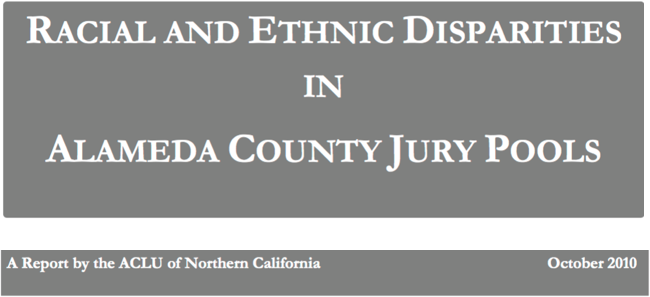

## Jury Panels

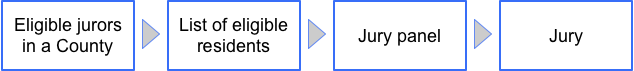

Section 197 of California's Code of Civil Procedure says, 
> "All persons selected for jury service shall be selected at random, from a source or sources inclusive of a representative cross section of the population of the area served by the court."

### ACLU study:
* ACLU studied the ethnic compisition of jury panels in 11 felony trials in Alameda county between 2009 and 2010.
* Total number of people reporting for jury duty: 1453
* Compared to demographics of the county

In [120]:
jury = Table('Ethnicity,Eligible,Panels'.split(',')).with_rows([
    ['Asian', 0.15, 0.26],
    ['Black', 0.18, 0.08],
    ['Latino', 0.12, 0.08],
    ['White', 0.54, 0.54],
    ['Other', 0.01, 0.04]
])

jury

Ethnicity | Eligible | Panels
Asian     | 0.15     | 0.26
Black     | 0.18     | 0.08
Latino    | 0.12     | 0.08
White     | 0.54     | 0.54
Other     | 0.01     | 0.04

### Are the differences in representation meaningful?
* Model: The people on the jury panels were selected at random from the eligible population
    - Alternative viewpoint: no, they weren't.
* Observed: empirical distribution of panels
* Statistic?
    - How do we deal with multiple categories?

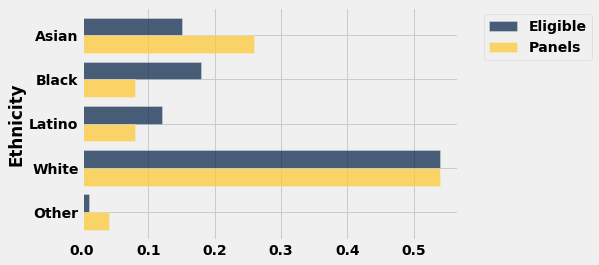

In [121]:
jury.barh('Ethnicity')

### A new statistic: Distance between distributions
* People on the panels are of multiple ethnicities
* Distribution of ethnicities is categorical

* To see whether the the distribution of ethnicities of the panels is close to that of the eligible jurors, we have to measure the distance between two categorical distributions



### Statistic: Total Variation Distance
* Consider the absolute differences for each value.
* Sum all these absolute differences (and divide by 2!)

In [124]:
jury_with_diffs = jury.with_column(
        'Difference', jury.column('Panels') - jury.column('Eligible'))
jury_with_diffs = jury_with_diffs.with_column(
        'Absolute Difference', np.abs(jury_with_diffs.column('Difference'))
)

In [125]:
jury_with_diffs

Ethnicity | Eligible | Panels | Difference | Absolute Difference
Asian     | 0.15     | 0.26   | 0.11       | 0.11
Black     | 0.18     | 0.08   | -0.1       | 0.1
Latino    | 0.12     | 0.08   | -0.04      | 0.04
White     | 0.54     | 0.54   | 0          | 0
Other     | 0.01     | 0.04   | 0.03       | 0.03

In [126]:
sum(jury_with_diffs.column('Absolute Difference')) / 2

0.14

### Total Variation Distance
* What is the TVD between "all eligible" and the observed panels?
    - is this number large?

In [127]:
def total_variation_distance(dist1, dist2):
    '''Given two empirical distributions, 
    both sorted with same categories, calculates the TVD'''
    return sum(np.abs(dist1 - dist2)) / 2

In [128]:
# Apply it to the Eligible and observed panel distributions
total_variation_distance(jury.column('Eligible'), jury.column('Panels'))

0.14

### Simulate drawing jury panels
* Model: Draw a random panel from "eligible" distribution
* Statistic: TVD between random panel and eligible
* Repeat and compare to observed statistic!

In [129]:
eligible = jury.column('Eligible')
sample_distribution = sample_proportions(1453, eligible)
panels_and_sample = jury.with_column('Random Sample', sample_distribution)

In [130]:
panels_and_sample

Ethnicity | Eligible | Panels | Random Sample
Asian     | 0.15     | 0.26   | 0.15967
Black     | 0.18     | 0.08   | 0.175499
Latino    | 0.12     | 0.08   | 0.114246
White     | 0.54     | 0.54   | 0.54095
Other     | 0.01     | 0.04   | 0.00963524

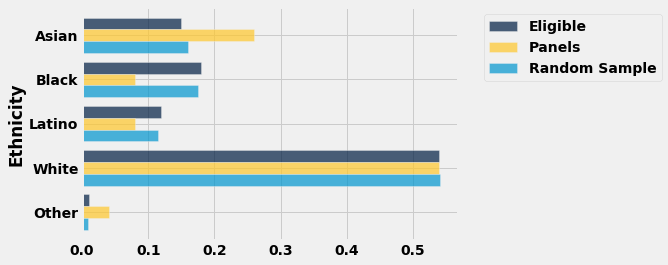

In [131]:
panels_and_sample.barh('Ethnicity')

In [132]:
total_variation_distance(panels_and_sample.column('Random Sample'), eligible)

0.010619408121128666

### Put together the simulation

In [133]:
tvds = make_array()

for i in np.arange(10000):
    sample_distribution = sample_proportions(1453, eligible)
    new_tvd = total_variation_distance(sample_distribution, eligible)
    tvds = np.append(tvds, new_tvd)

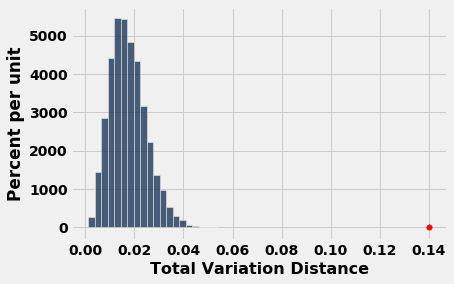

In [134]:
observed_tvd = total_variation_distance(jury.column('Panels'), eligible)

Table().with_column('Total Variation Distance', tvds).hist(bins = 20)
plt.scatter(observed_tvd, 0, color='red', s=30);

### Are the jury panels representative?
* Likely not! The random samples are not like the observed panels.
* This doesn't say *why* the distributions are different!
    - Juries drawn from voter rolls and DMV.
    - The county rarely follows up on failures to report.
    - Building the jury table is complicated! (see book)

### Summary of the method

To assess whether a sample was drawn randomly from a known categorical distribution:
* Use TVD as the statistic because it measures the distance between categorical distributions
* Sample at random from the population and compute the TVD from the random sample; repeat numerous times
* Compare:
    - Empirical distribution of simulated TVDs
    - Actual TVD from the sample in the study


# Decisions and Uncertainty

## Incomplete Information

* We try to choose between two views of the world, based on data in a sample.
* It's not always clear whether the data are consistent with one view or the other (unlike examples above).
* Random samples can turn out quite extreme. It is unlikely, but possible.


## Testing Hypotheses
* A test chooses between two views of how data were generated
* The views are called **hypotheses**
* The test picks the hypothesis that is better supported by the observed data


## Null and Alternative
* The method only works if we can simulate data under one of the hypotheses.
* **Null hypothesis**
    - A well defined chance model about how the data were generated
    - We can simulate data under the assumptions of this model – “under the null hypothesis”
* **Alternative hypothesis**
    - A different view about the origin of the data

## Test Statistic
* The statistic that we choose to simulate, to decide between the two hypotheses

Questions before choosing the statistic:
* What values of the statistic will make us lean towards the null hypothesis?
* What values will make us lean towards the alternative?
    - Preferably, the answer should be just “high”. Try to avoid “both high and low”.


## Prediction Under the Null Hypothesis
* Simulate the test statistic under the null hypothesis; draw the histogram of the simulated values
* This displays the **empirical distribution of the statistic under the null hypothesis**
* It is a prediction about the statistic, made by the null hypothesis 
    - It shows all the likely values of the statistic
    - Also how likely they are (if the null hypothesis is true)
* The probabilities are approximate, because we can’t generate all the possible random samples


## Conclusion of the Test
Resolve choice between null and alternative hypotheses
* Compare the **observed test statistic** and its empirical distribution under the null hypothesis
* If the observed value is **not consistent** with the distribution, then the test favors the alternative – “rejects the null hypothesis”

Whether a value is consistent with a distribution:
* A visualization may be sufficient
* If not, there are conventions about “consistency”


## Performing a Test

### The Problem

* Large Statistics class divided into 12 discussion sections
* TAs lead the sections

* After the midterm, students in Section 3 notice that the average score in their section is lower than in others.




### The TA's Defense

TA’s position (Null Hypothesis):
* If we had picked the students in my section at random from the whole class, we could have got an average like this one.

Alternative:
* No, the average score is too low. Randomness is not the only reason for the low scores.


In [ ]:
scores = Table.read_table('scores_by_section.csv')
scores

In [ ]:
scores.group('Section')

In [ ]:
# Calculate the average midterm score per section
scores.group('Section', np.average).show()

### What are the observed characteristics of section 3?
* Size of section? (`section_3_size`)
* Average of section? (`section_3_avg`)

In [ ]:
section_3_size = scores.group('Section').where('Section', 3).column('count').item(0)
section_3_avg = scores.group('Section', np.average).where('Section', 3).column('Midterm average').item(0)
print(section_3_size)
print(section_3_avg)

### Testing the null hypothesis
* Model: Sample uniformly (w/o replacement) 27 students from the class.
* Statistic: Calculate the average midterm score of "random" section.


In [ ]:
averages = make_array()

for i in np.arange(50000):
    random_sample = scores.sample(section_3_size, with_replacement = False)
    new_average = np.average(random_sample.column('Midterm'))
    averages = np.append(averages, new_average)

In [ ]:
#What would you say? 
#A. Looks like the TA is right  
#B. Looks like the students are right

In [ ]:
Table().with_column('Random Sample Average', averages).hist(bins = 25)
plt.scatter(section_3_avg, 0, color = 'red', s=40);

## The Verdict?
* Not as obvious as previous examples!
* Need a concept to capture the uncertainty of the conclusion.

### Question
* What is the probability that under the Null Hypothesis, a result *at least* as extreme as our observation holds?
* This quantity is called a **p-value**

In [ ]:
np.count_nonzero(averages <= section_3_avg) / 50000

In [ ]:
Table().with_column('Random Sample Average', averages).hist(bins = 25)
plt.scatter(section_3_avg, 0, color='red', s=30)
plt.plot([13.666, 13.666], [0, 0.35], color='gold', lw=2);

# Statistical Significance

## Conventions About Inconsistency

* **“Inconsistent with the null hypothesis”**: The test statistic is in the tail of the empirical distribution under the null hypothesis

* **“In the tail,” first convention**:
    - The area in the tail is less than 5%
    - The result is “statistically significant”

* **“In the tail,” second convention**:
    - The area in the tail is less than 1%
    - The result is “highly statistically significant”


## Definition of the P-value

Formal name: **observed significance level**

The P-value is the chance, under the null hypothesis, that the test statistic is equal to the value that was observed in the data or is even further in the direction of the alternative.

## An Error Probability

The cutoff for the P-value is an error probability.

* If:
    - your cutoff is 5%
    - and the null hypothesis happens to be true

* then there is about a 5% chance that your test will reject the null hypothesis.
